In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/CNN_MODEL_2023/

/content/drive/MyDrive/CNN_MODEL_2023


In [ ]:
ls

LAST_CNN.ipynb  Mood_2023.zip  photos/


In [ ]:
!unzip Mood_2023.zip

Archive:  Mood_2023.zip
   creating: Mood_2023/Test/
   creating: Mood_2023/Test/angry/
 extracting: Mood_2023/Test/angry/Training_27068424.jpg  
 extracting: Mood_2023/Test/angry/Training_28510377.jpg  
 extracting: Mood_2023/Test/angry/Training_28519605.jpg  
 extracting: Mood_2023/Test/angry/Training_28633118.jpg  
 extracting: Mood_2023/Test/angry/Training_28736990.jpg  
 extracting: Mood_2023/Test/angry/Training_32076966.jpg  
 extracting: Mood_2023/Test/angry/Training_37417413.jpg  
 extracting: Mood_2023/Test/angry/Training_37680245.jpg  
 extracting: Mood_2023/Test/angry/Training_38853251.jpg  
 extracting: Mood_2023/Test/angry/Training_39889509.jpg  
 extracting: Mood_2023/Test/angry/Training_40496339.jpg  
 extracting: Mood_2023/Test/angry/Training_41252773.jpg  
 extracting: Mood_2023/Test/angry/Training_41601598.jpg  
 extracting: Mood_2023/Test/angry/Training_48043757.jpg  
 extracting: Mood_2023/Test/angry/Training_48776522.jpg  
 extracting: Mood_2023/Test/angry/Training

In [ ]:
import pandas as pd
import seaborn as sns
import os
from tqdm.notebook import tqdm
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/CNN_MODEL_2023/Mood_2023/Train'
VAL_DIR = '/content/drive/MyDrive/CNN_MODEL_2023/Mood_2023/Validation'
TEST_DIR = '/content/drive/MyDrive/CNN_MODEL_2023/Mood_2023/Test'

train_dirs = sorted(os.listdir(TRAIN_DIR), key=lambda x: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'].index(x))
val_dirs = sorted(os.listdir(VAL_DIR), key=lambda x: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'].index(x))
test_dirs = sorted(os.listdir(TEST_DIR), key=lambda x: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'].index(x))

print(train_dirs)
print(val_dirs)
print(test_dirs)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
label_dict = {index: label for index, label in enumerate(train_dirs)}
print(label_dict)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [ ]:
def load_dataset(directory):
    image_paths = []
    labels = []

    sorted_labels = sorted(os.listdir(directory), key=lambda x: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'].index(x))

    for label in sorted_labels:
        for filename in os.listdir(os.path.join(directory, label)):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label, "Completed")

    return image_paths, labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


image    label
0  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...      sad
1  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...  neutral
2  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...  disgust
3  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...  disgust
4  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...  neutral

In [ ]:
train.shape

(2800, 2)

In [ ]:
val = pd.DataFrame()
val['image'], val['label'] = load_dataset(VAL_DIR)
val = val.sample(frac=1).reset_index(drop=True)
val.head()


angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


image     label
0  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...       sad
1  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...   disgust
2  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...     angry
3  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...     angry
4  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...  surprise

In [ ]:
val.shape

(840, 2)

In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test = test.sample(frac=1).reset_index(drop=True)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


image     label
0  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...     angry
1  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...     angry
2  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...       sad
3  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...  surprise
4  /content/drive/MyDrive/CNN_MODEL_2023/Mood_202...  surprise

In [ ]:
test.shape

(280, 2)

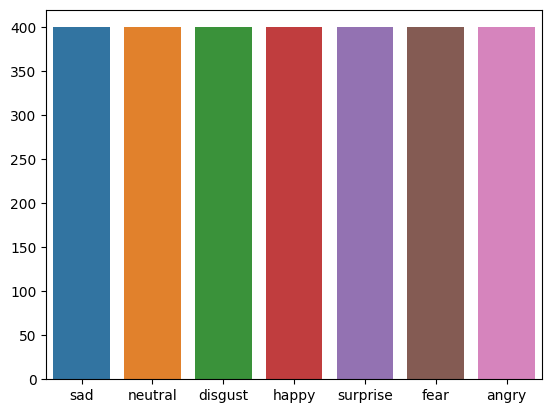

In [ ]:
label_counts = train['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.show()

In [ ]:
from PIL import Image


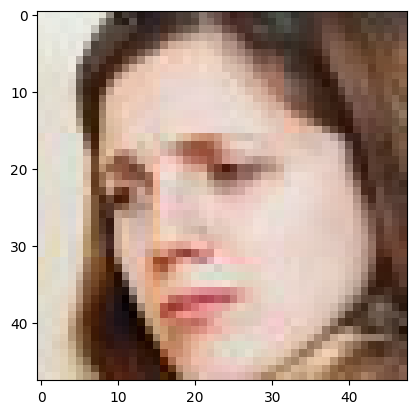

In [ ]:
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray')
plt.show()

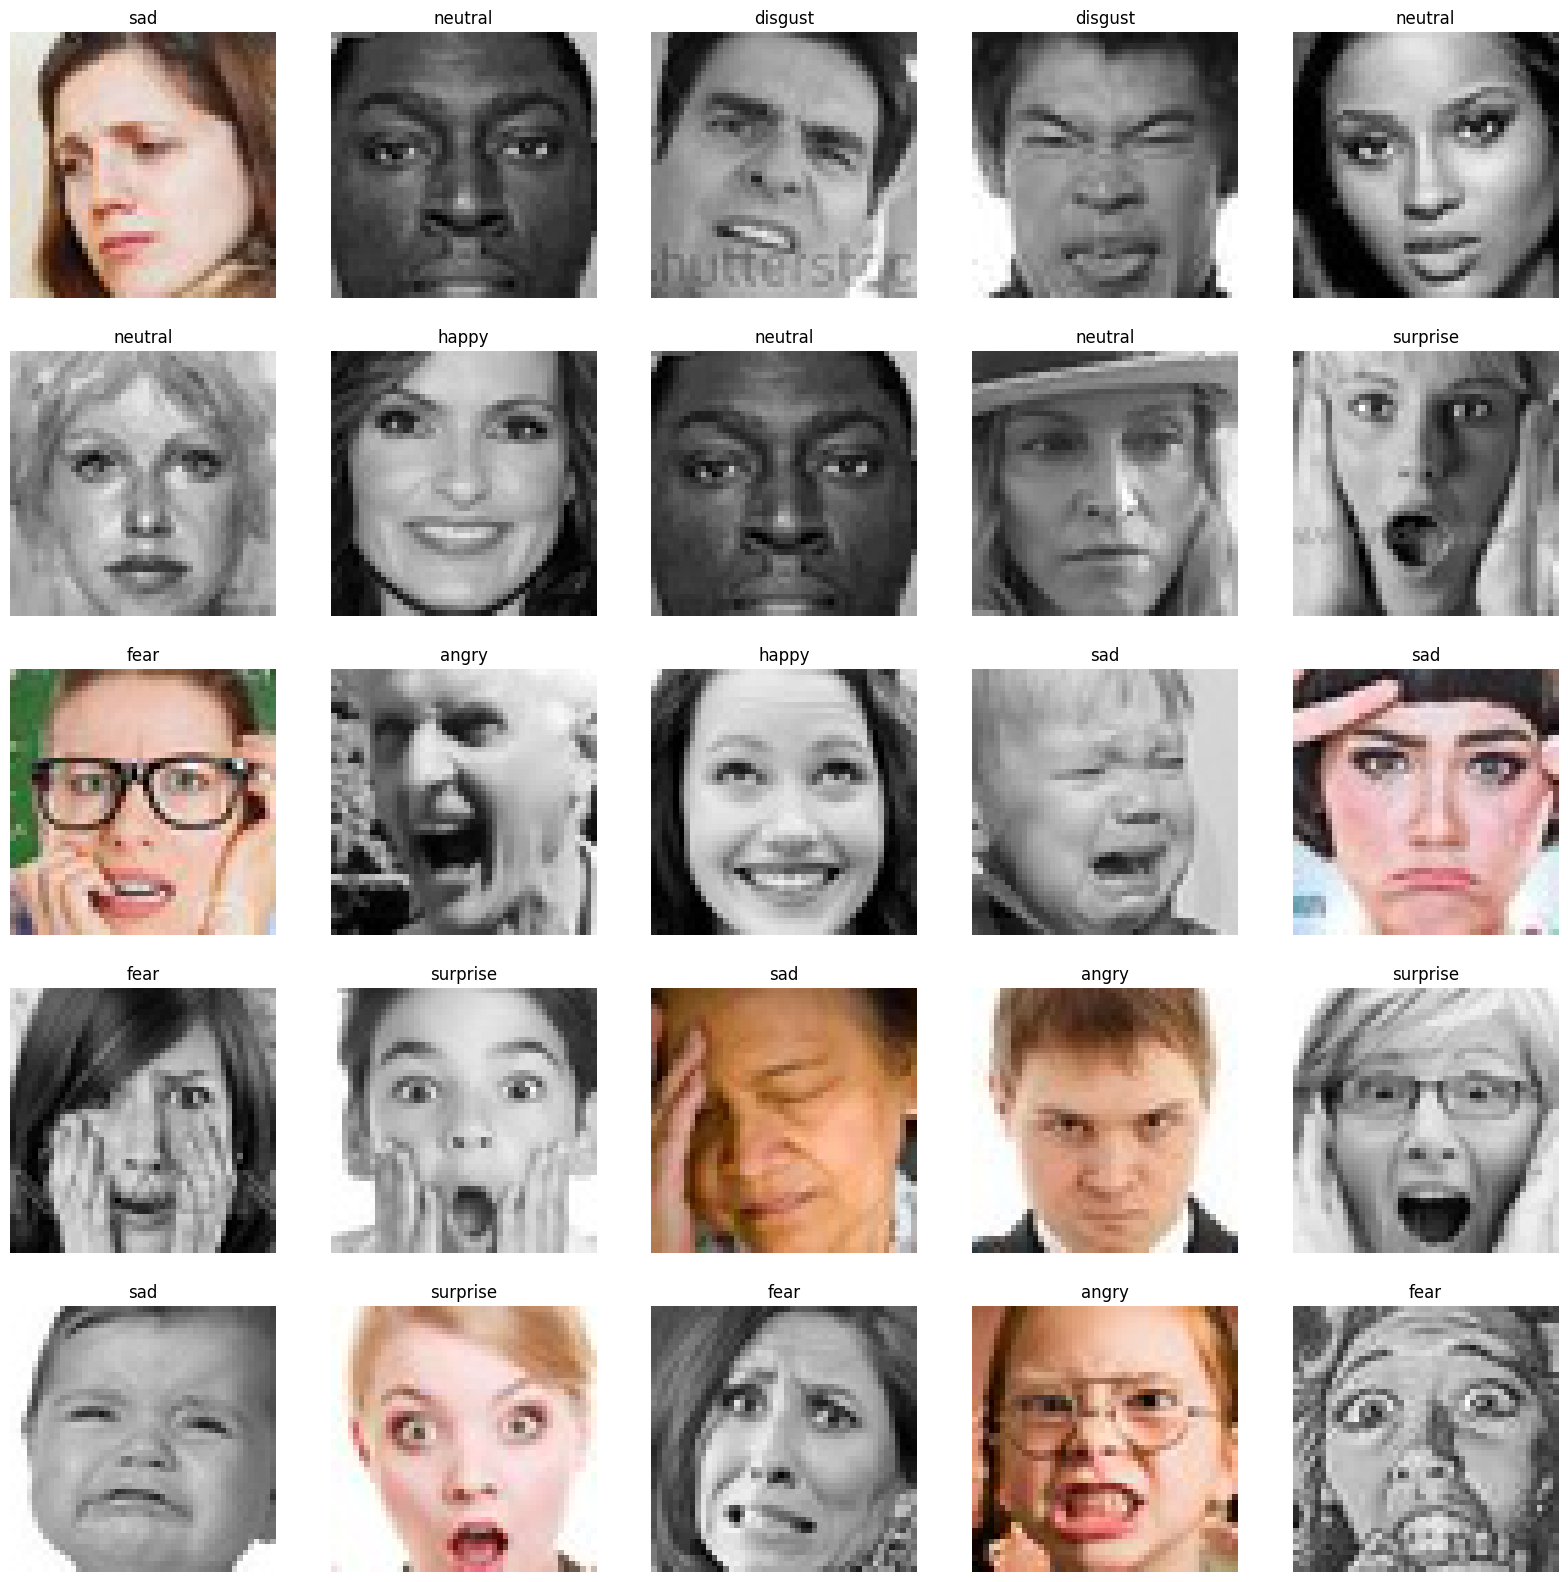

In [ ]:
# Display grid of images
plt.figure(figsize=(20, 20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [ ]:
# Feature Extraction
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/2800 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [ ]:
val_features = extract_features(val['image'])

  0%|          | 0/840 [00:00<?, ?it/s]

In [ ]:
# Normalize the images
x_train = train_features / 255.0
x_val = val_features / 255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_val = le.transform(val['label'])

In [ ]:
y_train = to_categorical(y_train, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # Split the data for validation
)

datagen.fit(x_train)


In [ ]:

# Create the model
model = Sequential(name='PRJ303')

# 1st CNN layer
model.add(Conv2D(32, (3,3), padding="same", input_shape=(48,48,1), name='conv_1'))
# model.add(BatchNormalization(name='batchnorm_1'))
model.add(Activation("relu", name='relu_1'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_1'))
# model.add(Dropout(0.25, name='dropout_1'))

# 2nd CNN layer
model.add(Conv2D(64, (3,3), padding="same", name='conv_2'))
# model.add(BatchNormalization(name='batchnorm_2'))
model.add(Activation("relu", name='relu_2'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_2'))
# model.add(Dropout(0.25, name='dropout_2'))

# 3rd CNN layer
model.add(Conv2D(128, (3,3), padding="same", name='conv_3'))
# model.add(BatchNormalization(name='batchnorm_3'))
model.add(Activation("relu", name='relu_3'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool_3'))
# model.add(Dropout(0.25, name='dropout_3'))

# 4th CNN layer
model.add(Conv2D(256, (3,3), padding='same', name='conv_4'))
# model.add(BatchNormalization(name='batchnorm_4'))
model.add(Activation('relu', name='relu_4'))
model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool_4'))
# model.add(Dropout(0.25, name='dropout_4'))

model.add(Flatten(name='flatten'))

# Fully connected 1st layer
model.add(Dense(256, name='dense_1'))
# model.add(BatchNormalization(name='batchnorm_5'))
model.add(Activation('relu', name='relu_5'))
# model.add(Dropout(0.25, name='dropout_5'))

# # Fully connected 2nd layer
# model.add(Dense(512, name='dense_2'))
# model.add(BatchNormalization(name='batchnorm_6'))
# model.add(Activation('relu', name='relu_6'))
# model.add(Dropout(0.25, name='dropout_6'))

model.add(Dense(7, activation="softmax", name='output'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "PRJ303"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 relu_1 (Activation)         (None, 48, 48, 32)        0         
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 24, 24, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 24, 24, 64)        18496     
                                                                 
 relu_2 (Activation)         (None, 24, 24, 64)        0         
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 12, 12, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 12, 12, 128)       73856

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

file_name = 'best_model.h5'
checkpoint_path = os.path.join('checkpoint', file_name)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

file_name = 'best_model.h5'
checkpoint_path = os.path.join('checkpoint', file_name)

# Define the callbacks
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                            monitor='val_accuracy',
                                            save_freq='epoch',
                                            mode='max',
                                            save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss',
                                         patience=11,
                                         verbose=1,
                                         restore_best_weights=True)

callbacks = [model_checkpoint_callback, early_stopping_callback]

In [ ]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 64,
                    epochs=25,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Epoch 1/25
43/43 [==============================] - 2s 39ms/step - loss: 0.2125 - accuracy: 0.9218 - val_loss: 0.2361 - val_accuracy: 0.9310
Epoch 2/25
43/43 [==============================] - 2s 38ms/step - loss: 0.2070 - accuracy: 0.9279 - val_loss: 0.2602 - val_accuracy: 0.9167
Epoch 3/25
43/43 [==============================] - 2s 53ms/step - loss: 0.1892 - accuracy: 0.9304 - val_loss: 0.2386 - val_accuracy: 0.9274
Epoch 4/25
43/43 [==============================] - 3s 76ms/step - loss: 0.1863 - accuracy: 0.9336 - val_loss: 0.2416 - val_accuracy: 0.9345
Epoch 5/25
43/43 [==============================] - 2s 35ms/step - loss: 0.1667 - accuracy: 0.9425 - val_loss: 0.2751 - val_accuracy: 0.9167
Epoch 6/25
43/43 [==============================] - 1s 33ms/step - loss: 0.1770 - accuracy: 0.9396 - val_loss: 0.2630 - val_accuracy: 0.9202
Epoch 7/25
43/43 [==============================] - 1s 34ms/step - loss: 0.1610 - accuracy: 0.9411 - val_loss: 0.2462 - val_accuracy: 0.9274
Epoch 8/25
43

In [ ]:
evaluation = model.evaluate(x_val, y_val)
print("Validation Loss: {:.4f}".format(evaluation[0]))
print("Validation Accuracy: {:.4f}".format(evaluation[1]))


27/27 [==============================] - 0s 4ms/step - loss: 0.2361 - accuracy: 0.9310
Validation Loss: 0.2361
Validation Accuracy: 0.9310


In [ ]:
# Make predictions on the validation dataset
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

27/27 [==============================] - 0s 2ms/step


27/27 [==============================] - 0s 3ms/step


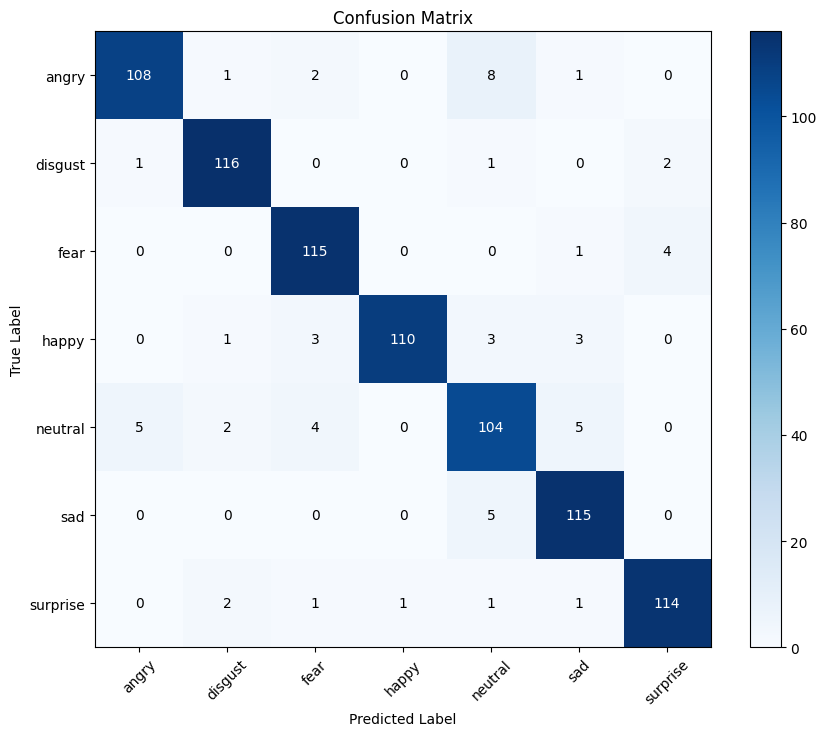

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the validation dataset
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_val_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_dict))
plt.xticks(tick_marks, label_dict.values(), rotation=45)
plt.yticks(tick_marks, label_dict.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'white' if cm[i, j] > thresh else 'black'
        plt.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.show()


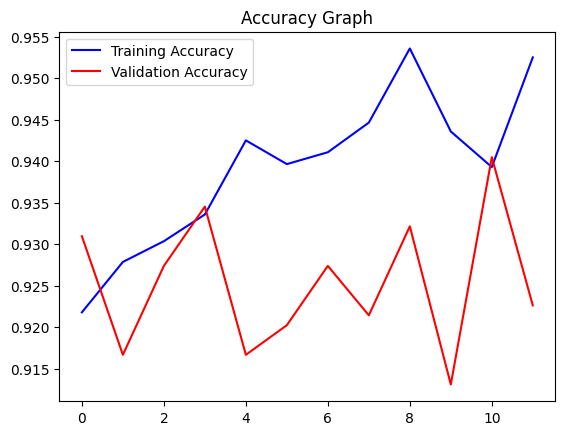

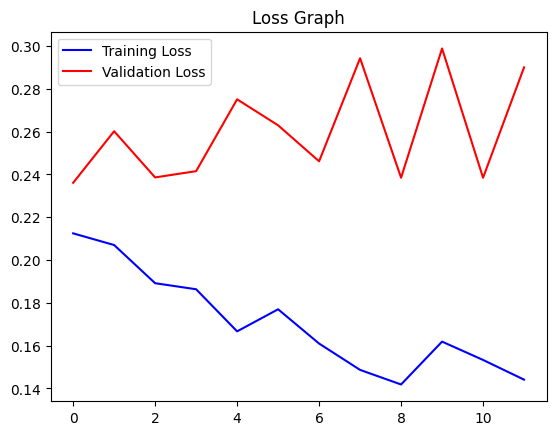

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()


In [ ]:
predictions = model.predict(x_val)


27/27 [==============================] - 0s 2ms/step


In [ ]:
predicted_labels = np.argmax(predictions, axis=1)



1/1 [==============================] - 0s 21ms/step


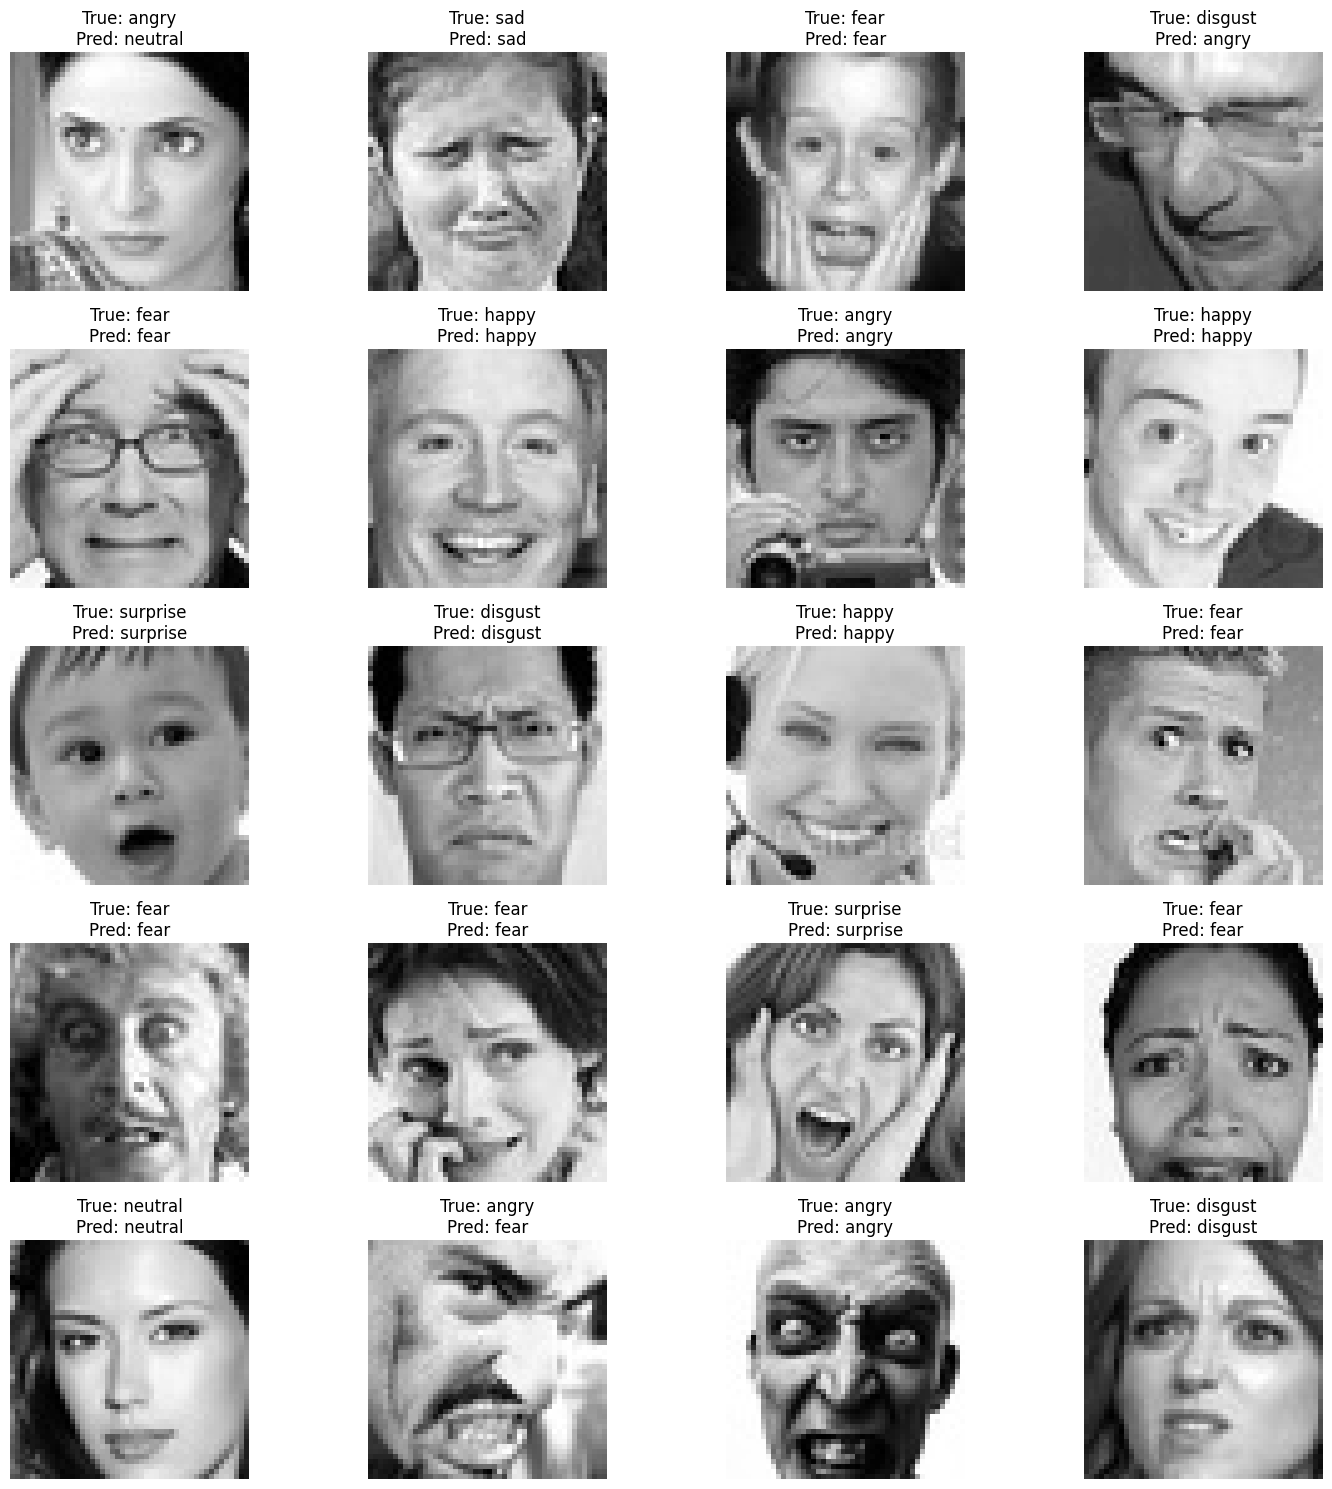

In [ ]:

# Select 20 random test images
indices = random.sample(range(len(val)), 20)

# Create a figure with 4 columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Loop through selected test images
for i, ax in zip(indices, axes.flatten()):
    # Make prediction for image
    pred = model.predict(x_val[i].reshape(1, 48, 48, 1))
    prediction_label = le.inverse_transform([pred.argmax()])[0]
    # Display results
    ax.imshow(x_val[i].reshape(48, 48), cmap='gray')
    ax.set_title("True: {}\nPred: {}".format(val['label'][i], prediction_label))
    ax.axis('off')

plt.tight_layout()
plt.show()





In [ ]:
# Create a 10x2 grid of subplots
fig, ax = plt.subplots(nrows=20, ncols=10, figsize=(20, 40))

# Loop through all test images
for i in range(len(val)):
    # Make prediction for image
    pred = model.predict(x_val[i].reshape(1, 48, 48, 1))
    prediction_label = le.inverse_transform([pred.argmax()])[0]
    actual_label = val['label'][i]
    
    # Compute row and column indices for the current subplot
    row = i // 10
    col = i % 10
    
    # Display image and labels in current subplot
    ax[row, col].imshow(x_val[i].reshape(48, 48), cmap='gray')
    ax[row, col].axis('off')
    ax[row, col].set_title("Actual: {}\nPredicted: {}".format(actual_label, prediction_label))
    
    # Stop looping if we have displayed 200 images
    if i == 199:
        break
        
# Adjust spacing between subplots and show the figure
fig.tight_layout()
plt.show()


1/1 [==============================] - 0s 20ms/step


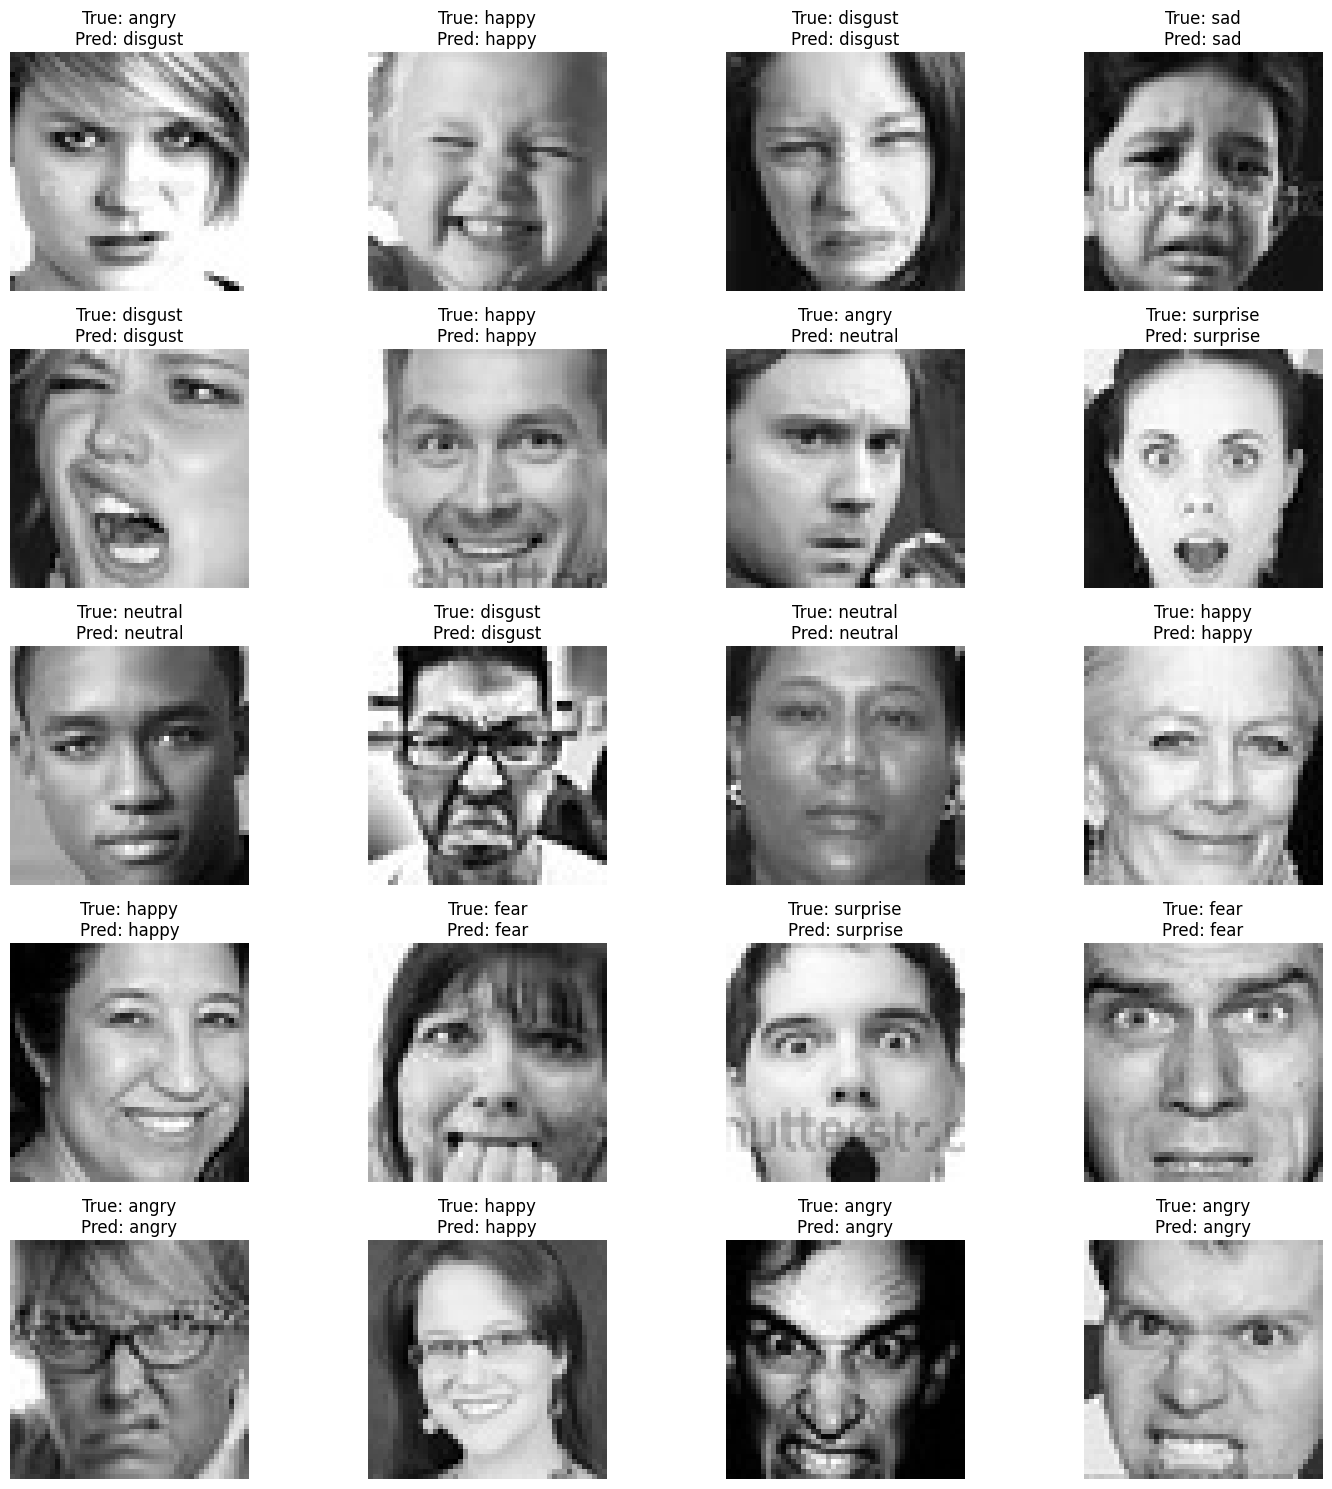

In [ ]:
import random

# Select 20 random test images
indices = random.sample(range(len(train)), 20)

# Create a figure with 4 columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Loop through selected test images
for i, ax in zip(indices, axes.flatten()):
    # Make prediction for image
    pred = model.predict(x_train[i].reshape(1, 48, 48, 1))
    prediction_label = le.inverse_transform([pred.argmax()])[0]
    # Display results
    ax.imshow(x_train[i].reshape(48, 48), cmap='gray')
    ax.set_title("True: {}\nPred: {}".format(train['label'][i], prediction_label))
    ax.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 21ms/step


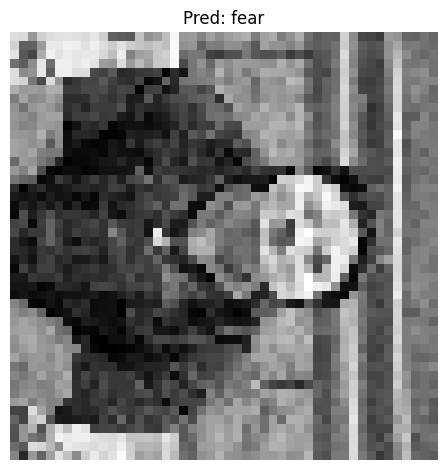

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Specify the path to the PNG image
image_file_path = '/content/drive/MyDrive/CNN_MODEL_2023/photos/suja.png'

# Load and preprocess the image
img = load_img(image_file_path, color_mode='grayscale', target_size=(48, 48))
img = np.array(img) / 255.0
img = img.reshape(1, 48, 48, 1)

# Make prediction for the image
pred = model.predict(img)
prediction_label = le.inverse_transform([pred.argmax()])[0]

# Display the image and predicted label
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title("Pred: {}".format(prediction_label))
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 20ms/step


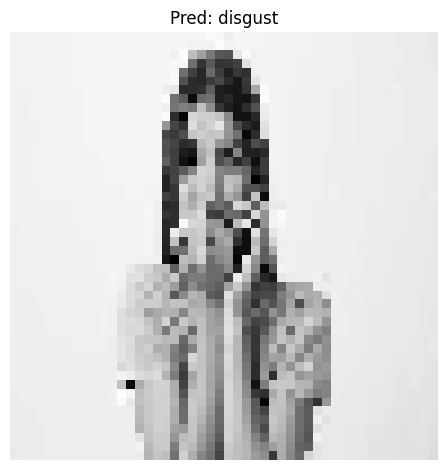

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Specify the path to the PNG image
image_file_path = '/content/drive/MyDrive/CNN_MODEL_2023/photos/fear.jpg'

# Load and preprocess the image
img = load_img(image_file_path, color_mode='grayscale', target_size=(48, 48))
img = np.array(img) / 255.0
img = img.reshape(1, 48, 48, 1)

# Make prediction for the image
pred = model.predict(img)
prediction_label = le.inverse_transform([pred.argmax()])[0]

# Display the image and predicted label
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title("Pred: {}".format(prediction_label))
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 21ms/step


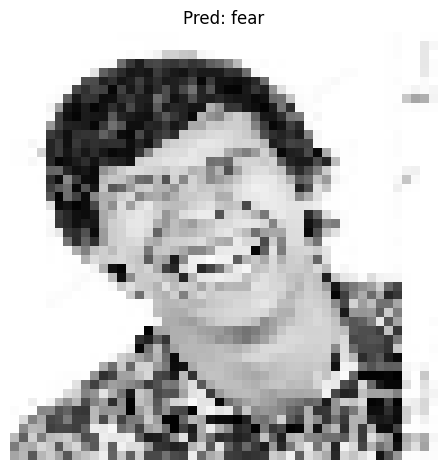

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Specify the path to the PNG image
image_file_path = '/content/drive/MyDrive/CNN_MODEL_2023/photos/happyb.jpg'

# Load and preprocess the image
img = load_img(image_file_path, color_mode='grayscale', target_size=(48, 48))
img = np.array(img) / 255.0
img = img.reshape(1, 48, 48, 1)

# Make prediction for the image
pred = model.predict(img)
prediction_label = le.inverse_transform([pred.argmax()])[0]

# Display the image and predicted label
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title("Pred: {}".format(prediction_label))
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 30ms/step


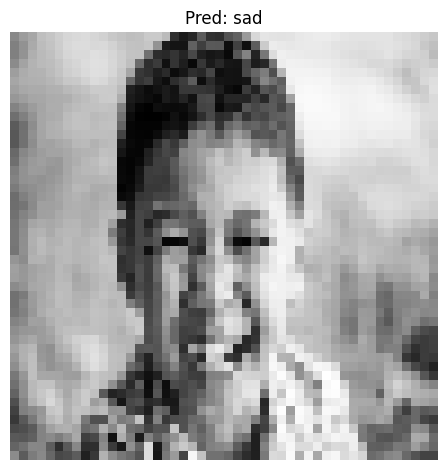

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Specify the path to the PNG image
image_file_path = '/content/drive/MyDrive/CNN_MODEL_2023/photos/happybaby.jpg'

# Load and preprocess the image
img = load_img(image_file_path, color_mode='grayscale', target_size=(48, 48))
img = np.array(img) / 255.0
img = img.reshape(1, 48, 48, 1)

# Make prediction for the image
pred = model.predict(img)
prediction_label = le.inverse_transform([pred.argmax()])[0]

# Display the image and predicted label
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title("Pred: {}".format(prediction_label))
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 20ms/step


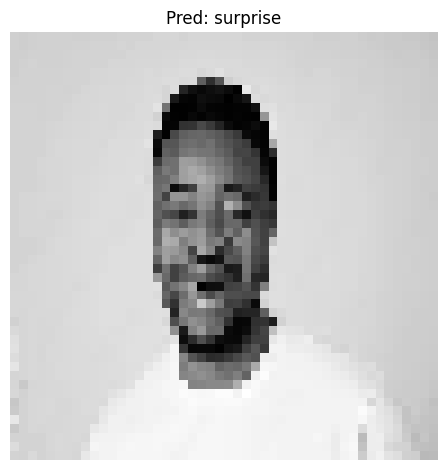

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Specify the path to the PNG image
image_file_path = '/content/drive/MyDrive/CNN_MODEL_2023/photos/suja.jpg'

# Load and preprocess the image
img = load_img(image_file_path, color_mode='grayscale', target_size=(48, 48))
img = np.array(img) / 255.0
img = img.reshape(1, 48, 48, 1)

# Make prediction for the image
pred = model.predict(img)
prediction_label = le.inverse_transform([pred.argmax()])[0]

# Display the image and predicted label
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title("Pred: {}".format(prediction_label))
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 25ms/step


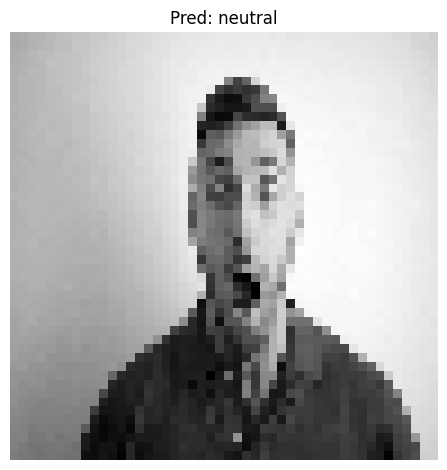

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Specify the path to the PNG image
image_file_path = '/content/drive/MyDrive/CNN_MODEL_2023/photos/surprise.jpg'

# Load and preprocess the image
img = load_img(image_file_path, color_mode='grayscale', target_size=(48, 48))
img = np.array(img) / 255.0
img = img.reshape(1, 48, 48, 1)

# Make prediction for the image
pred = model.predict(img)
prediction_label = le.inverse_transform([pred.argmax()])[0]

# Display the image and predicted label
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title("Pred: {}".format(prediction_label))
plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 20ms/step


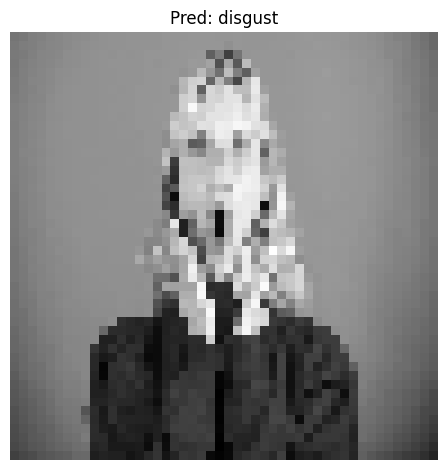

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Specify the path to the PNG image
image_file_path = '/content/drive/MyDrive/CNN_MODEL_2023/photos/sujatasur.jpg'

# Load and preprocess the image
img = load_img(image_file_path, color_mode='grayscale', target_size=(48, 48))
img = np.array(img) / 255.0
img = img.reshape(1, 48, 48, 1)

# Make prediction for the image
pred = model.predict(img)
prediction_label = le.inverse_transform([pred.argmax()])[0]

# Display the image and predicted label
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title("Pred: {}".format(prediction_label))
plt.axis('off')

plt.tight_layout()
plt.show()
